In [119]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [120]:
data = pd.read_csv("data.csv")
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [121]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for missing values after conversion
print(data['TotalCharges'].isnull().sum())

# Fill missing values with mean or any other appropriate method
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

# Check the data types again
print(data['TotalCharges'].dtype)

11
float64


In [122]:
# print(data.isnull().sum())
print(data.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [123]:
data.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [124]:
data.replace(' ', np.nan, inplace=True)
numeric_columns = data[['tenure', 'MonthlyCharges', 'TotalCharges']]
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.824757
MonthlyCharges  0.247900        1.000000      0.650468
TotalCharges    0.824757        0.650468      1.000000


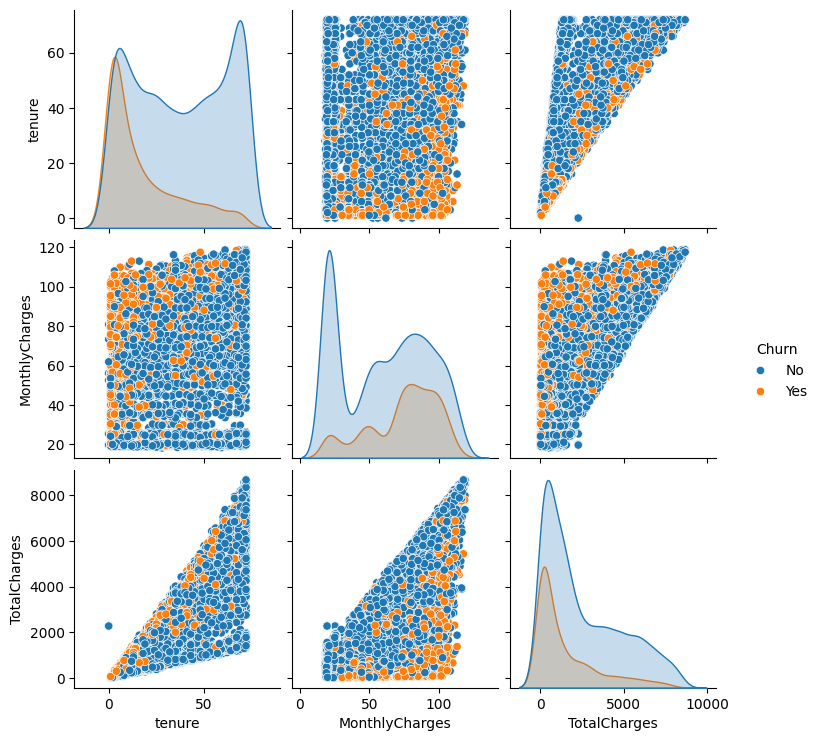

In [125]:

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

sns.pairplot(data, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn', diag_kind='kde')
plt.show()

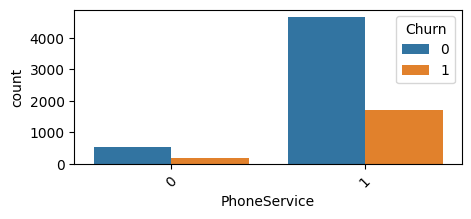

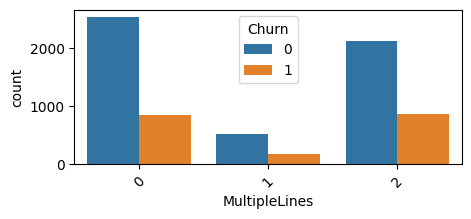

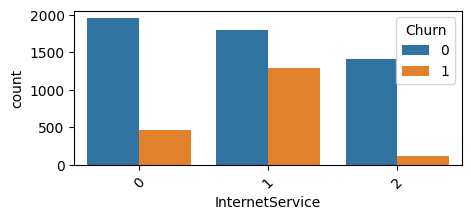

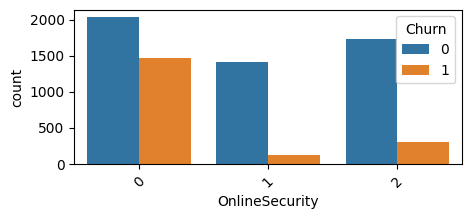

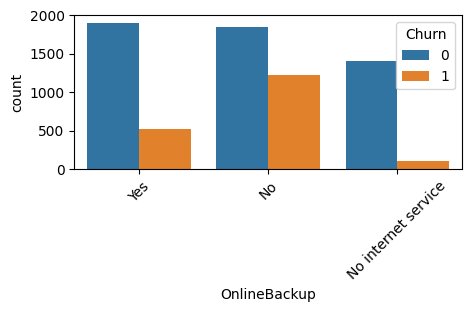

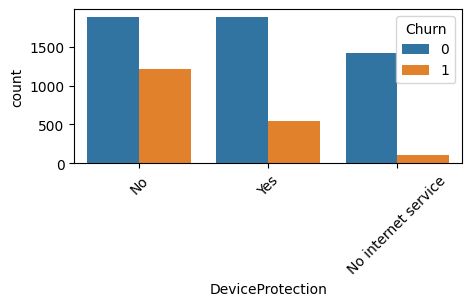

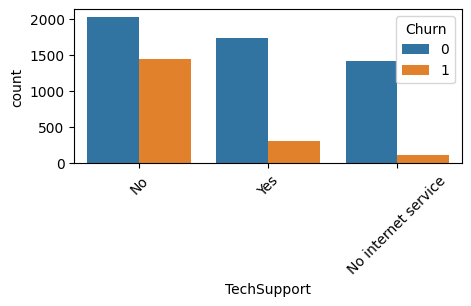

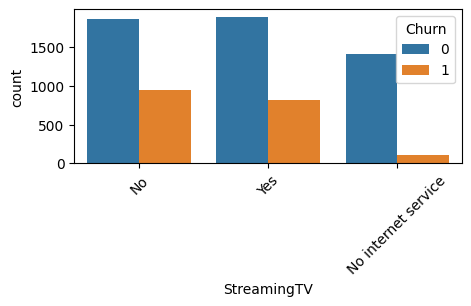

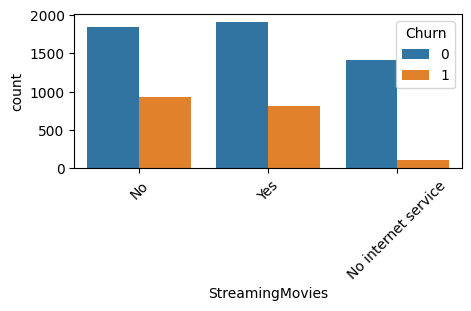

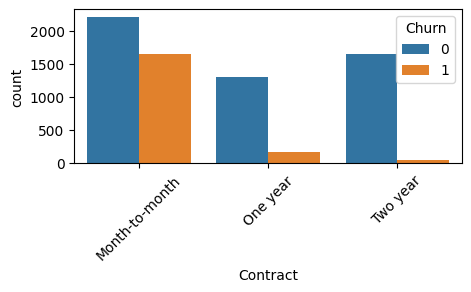

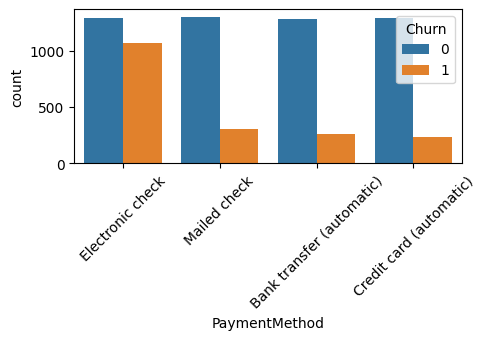

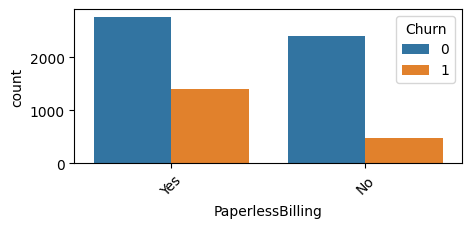

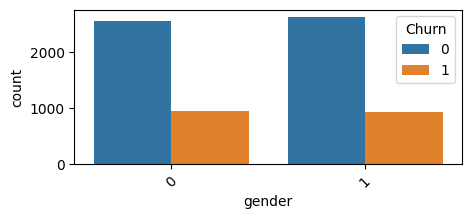

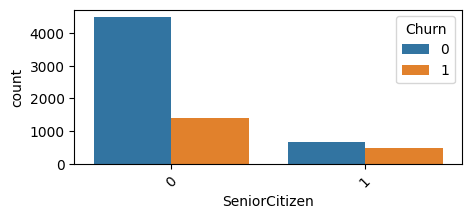

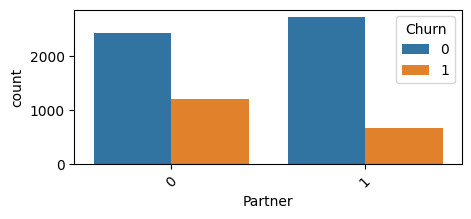

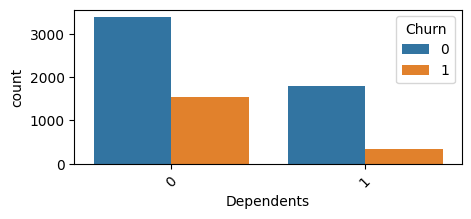

In [135]:
categorical_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaymentMethod', 'PaperlessBilling', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']

for column in categorical_columns:
    plt.figure(figsize=(5, 2))
    sns.countplot(x=column, hue='Churn', data=data)
    plt.xticks(rotation=45)
    plt.show()

In [127]:
label_encoders = {}
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'Churn']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [128]:
X = data.drop(['Churn','customerID'], axis=1)  # Features
y = data['Churn']  # Target variable

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

ValueError: could not convert string to float: 'No'

In [ ]:
predictions = naive_bayes.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy*100 , "%")

Accuracy: 67.21078779276083 %


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)  # You can adjust the number of neighbors as needed
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
predictions = knn_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy*100, "%")

Accuracy: 79.4180269694819 %


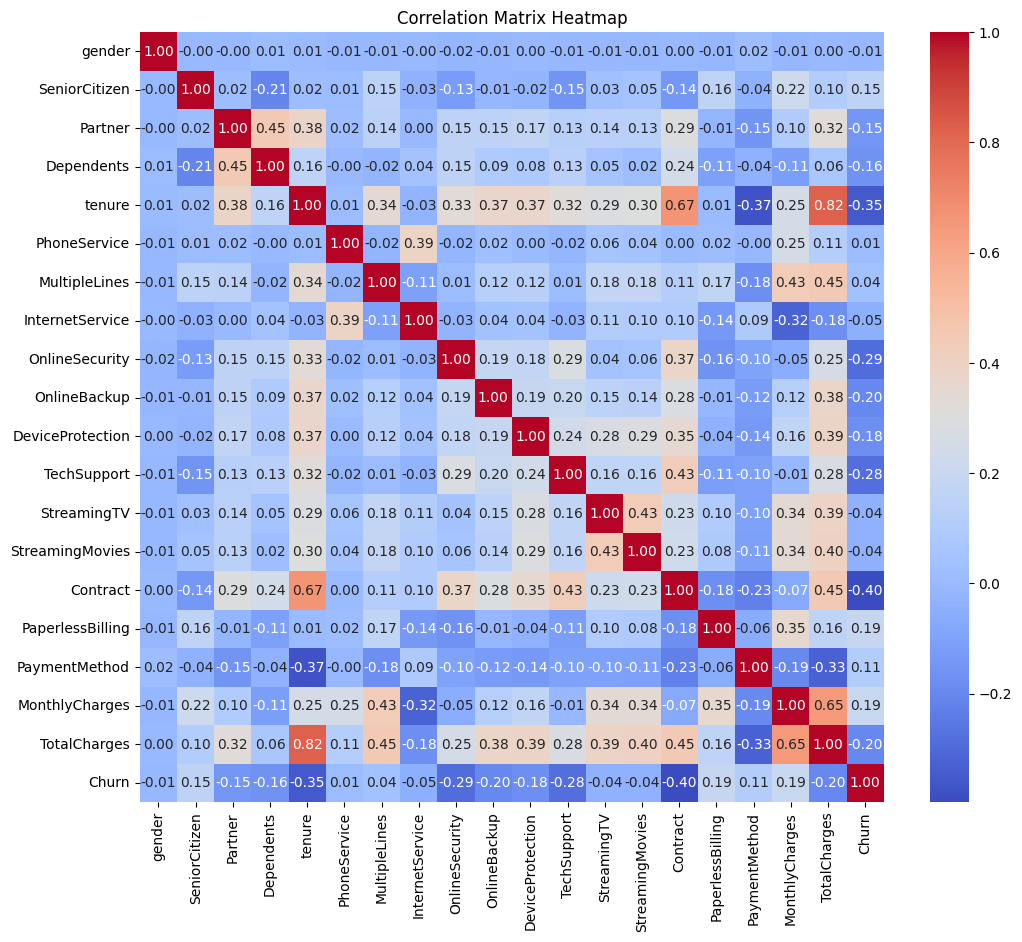

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.drop('customerID',axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

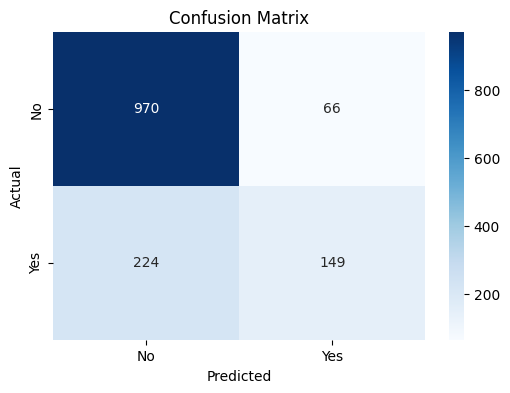

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()